# Data Exploration

In [1]:
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import *
spark = SparkSession.builder.appName('IterationFour').getOrCreate()

from pyspark.ml.classification import LogisticRegression

In [16]:
df = spark.read.csv('Dataset/San Francisco 2017.csv',header=True,inferSchema=True)

In [15]:
dff = spark.read.csv('Dataset/Radio_Codes.csv',header=True,inferSchema=True)

In [2]:
final = spark.read.csv('Dataset/final.csv',header=True,inferSchema=True)

In [4]:
df.show()

+---------+--------------------+----------+---------+-----------+--------+---------------+------------+--------------------+-------------+-----+---------+---------------+--------------------+
|  CrimeId|OriginalCrimeTypName|ReportDate| CallDate|OffenseDate|CallTime|   CallDateTime| Disposition|             Address|         City|State|Agency Id|    AddressType|      CommonLocation|
+---------+--------------------+----------+---------+-----------+--------+---------------+------------+--------------------+-------------+-----+---------+---------------+--------------------+
|170432492|        Passing Call| 2/12/2017|2/12/2017|  2/12/2017|   17:04|2/12/2017 17:04|Not recorded|Sunnydale Av/hahn St|San Francisco|   CA|        1|   Intersection|                null|
|170603312|     Muni Inspection|  3/1/2017| 3/1/2017|   3/1/2017|   17:37| 3/1/2017 17:37|         HAN|  16th St/mission St|San Francisco|   CA|        1|   Intersection|                null|
|170453991|        Traffic Stop| 2/14/20

In [6]:
dff.show()

+----+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|Code|  DispositionMeaning| _c2| _c3| _c4| _c5| _c6| _c7| _c8| _c9|_c10|_c11|_c12|_c13|_c14|_c15|
+----+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
| ABA|             Abated |null|null|null|null|null|null|null|null|null|null|null|null|null|null|
| ADM|          Admonished|null|null|null|null|null|null|null|null|null|null|null|null|null|null|
| ADV|             Advised|null|null|null|null|null|null|null|null|null|null|null|null|null|null|
| ARR|             Arrest |null|null|null|null|null|null|null|null|null|null|null|null|null|null|
| CAN|              Cancel|null|null|null|null|null|null|null|null|null|null|null|null|null|null|
| CSA|    CPSA assignment |null|null|null|null|null|null|null|null|null|null|null|null|null|null|
|  22|              Cancel|null|null|null|null|null|null|null|null|null|null|null|null|null|null|
| CIT|              

In [58]:
final.show()

+------+------------------+----------+----+-----+---------------+
|IsDrug|DispositionMeaning|DayOfMonth|Hour|Month|    AddressType|
+------+------------------+----------+----+-----+---------------+
|    No|           Handled|         1|  17|    3|   Intersection|
|    No|             Cited|        14|  23|    2|   Intersection|
|    No|             Cited|        14|  23|    2|   Intersection|
|    No|           Handled|         1|  13|    4|Common Location|
|    No|   Gone on Arrival|         9|  20|    2|Common Location|
|    No|           Handled|         1|  15|    4|Premise Address|
|    No|            Report|        31|  17|    1|Premise Address|
|    No|            Report|        19|  11|    2|Premise Address|
|    No|           Handled|        21|   7|    3|Premise Address|
|    No|           Handled|        23|   7|    3|Premise Address|
|    No|   Gone on Arrival|        11|  15|    2|Common Location|
|    No|          No Merit|        11|  15|    2|   Intersection|
|    No|  

In [5]:
df.printSchema()

root
 |-- Crime Id: integer (nullable = true)
 |-- Original Crime Type Name: string (nullable = true)
 |-- Report Date: string (nullable = true)
 |-- Call Date: string (nullable = true)
 |-- Offense Date: string (nullable = true)
 |-- Call Time: string (nullable = true)
 |-- Call Date Time: string (nullable = true)
 |-- Disposition: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Agency Id: integer (nullable = true)
 |-- Address Type: string (nullable = true)
 |-- Common Location: string (nullable = true)



In [12]:
df.select("City").distinct().show()

+-------------+
|         City|
+-------------+
|   Fort Mason|
|San Francisco|
|         null|
|     Brisbane|
|    Daly City|
|  Yerba Buena|
|     Presidio|
|Hunters Point|
|Treasure Isla|
+-------------+



In [13]:
df.select("State").distinct().show()

+-----+
|State|
+-----+
|   CA|
+-----+



In [14]:
df.select("Address Type").distinct().show()

+---------------+
|   Address Type|
+---------------+
|   Intersection|
|Common Location|
|Premise Address|
|   Geo-Override|
+---------------+



In [7]:
df.select("Disposition").distinct().show()

+-----------+
|Disposition|
+-----------+
|        CHP|
|        DUP|
|        ABA|
|        INC|
|        TH2|
|         22|
|        NOM|
|        HOT|
|        GOA|
|        CIT|
|        HAN|
|        ADM|
|        ENC|
|        FIR|
|        OME|
|         ND|
|        SFD|
|        PAS|
|        CRT|
|        UTL|
+-----------+
only showing top 20 rows



In [17]:
df.createOrReplaceTempView("SanFran")

In [36]:
dfQuery = spark.sql("SELECT month(CAST(UNIX_TIMESTAMP(CallDate, 'MM/dd/yyyy') AS TIMESTAMP)) AS Month, COUNT(*) AS Count FROM SanFran GROUP BY month(CAST(UNIX_TIMESTAMP(CallDate, 'MM/dd/yyyy') AS TIMESTAMP)) ORDER BY Count DESC").show()

+-----+-----+
|Month|Count|
+-----+-----+
|    9|62518|
|    8|56213|
|    3|55649|
|    1|51322|
|    5|49950|
|    2|47564|
|    4|46407|
|    7|44662|
|    6|42713|
|   10|23856|
|   11|  102|
+-----+-----+



In [37]:
df.describe().show()

+-------+--------------------+--------------------+----------+--------+-----------+--------+-------------+-----------+--------------------+-----------+------+---------+---------------+--------------------+
|summary|             CrimeId|OriginalCrimeTypName|ReportDate|CallDate|OffenseDate|CallTime| CallDateTime|Disposition|             Address|       City| State|Agency Id|    AddressType|      CommonLocation|
+-------+--------------------+--------------------+----------+--------+-----------+--------+-------------+-----------+--------------------+-----------+------+---------+---------------+--------------------+
|  count|              480956|              480956|    480956|  480956|     480956|  480956|       480956|     480956|              480956|     467364|480956|   480956|         480956|               48954|
|   mean|1.7146812263684413E8|   8837.803080576368|      null|    null|       null|    null|         null|       22.0|   734.3333333333334|       null|  null|      1.0|        

In [40]:
dfQuery = spark.sql("SELECT DISTINCT City, COUNT(*) AS Count FROM SanFran GROUP BY City").show()

+-------------+------+
|         City| Count|
+-------------+------+
|   Fort Mason|    11|
|San Francisco|464769|
|         null| 13592|
|     Brisbane|     8|
|    Daly City|   258|
|  Yerba Buena|   137|
|     Presidio|   133|
|Hunters Point|   144|
|Treasure Isla|  1904|
+-------------+------+



In [46]:
dfQuery = spark.sql("SELECT COUNT(DISTINCT OriginalCrimeTypName) AS COUNT FROM SanFran").show()

+-----+
|COUNT|
+-----+
| 6408|
+-----+



# Data Preparation

In [45]:
dfQuery = spark.sql("SELECT OriginalCrimeTypName, ReportDate, CallTime, Disposition, AddressType FROM SanFran").show()

+--------------------+----------+--------+------------+---------------+
|OriginalCrimeTypName|ReportDate|CallTime| Disposition|    AddressType|
+--------------------+----------+--------+------------+---------------+
|        Passing Call| 2/12/2017|   17:04|Not recorded|   Intersection|
|     Muni Inspection|  3/1/2017|   17:37|         HAN|   Intersection|
|        Traffic Stop| 2/14/2017|   23:01|         CIT|   Intersection|
|        Traffic Stop| 2/14/2017|   23:01|         CIT|   Intersection|
|        Passing Call|  4/1/2017|   13:46|         HAN|Common Location|
|         Return Call|  2/9/2017|   20:40|         GOA|Common Location|
|          Trespasser|  4/1/2017|   15:06|         HAN|Premise Address|
|         Petty Theft| 1/31/2017|   17:39|         REP|Premise Address|
|                 Rep| 2/19/2017|   11:20|         REP|Premise Address|
|                 915| 3/21/2017|    7:33|         HAN|Premise Address|
|              22500e| 3/23/2017|    7:57|         HAN|Premise A

In [47]:
dfQuery = spark.sql("SELECT OriginalCrimeTypName, ReportDate, CallTime, Disposition, AddressType 
                    FROM SanFran 
                    WHERE City = 'San Francisco'").show()

+--------------------+----------+--------+------------+---------------+
|OriginalCrimeTypName|ReportDate|CallTime| Disposition|    AddressType|
+--------------------+----------+--------+------------+---------------+
|        Passing Call| 2/12/2017|   17:04|Not recorded|   Intersection|
|     Muni Inspection|  3/1/2017|   17:37|         HAN|   Intersection|
|        Traffic Stop| 2/14/2017|   23:01|         CIT|   Intersection|
|        Traffic Stop| 2/14/2017|   23:01|         CIT|   Intersection|
|        Passing Call|  4/1/2017|   13:46|         HAN|Common Location|
|         Return Call|  2/9/2017|   20:40|         GOA|Common Location|
|          Trespasser|  4/1/2017|   15:06|         HAN|Premise Address|
|         Petty Theft| 1/31/2017|   17:39|         REP|Premise Address|
|                 Rep| 2/19/2017|   11:20|         REP|Premise Address|
|                 915| 3/21/2017|    7:33|         HAN|Premise Address|
|              22500e| 3/23/2017|    7:57|         HAN|Premise A

In [48]:
dfQuery = spark.sql("SELECT CASE WHEN OriginalCrimeTypName LIKE '%Drug%' THEN 1 ELSE 0 END AS IsDrug 
                    FROM SanFran 
                    WHERE City = 'San Francisco'").show()

+------+
|IsDrug|
+------+
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
+------+
only showing top 20 rows



In [76]:
dfQuery = spark.sql("SELECT dayofmonth(CAST(UNIX_TIMESTAMP(CallDate, 'MM/dd/yyyy') AS TIMESTAMP)) AS DayOfMonth, hour(CallTime) AS Hour, month(CAST(UNIX_TIMESTAMP(CallDate, 'MM/dd/yyyy') AS TIMESTAMP)) AS Month, AddressType FROM SanFran").show()

+----------+----+-----+---------------+
|DayOfMonth|Hour|Month|    AddressType|
+----------+----+-----+---------------+
|        12|  17|    2|   Intersection|
|         1|  17|    3|   Intersection|
|        14|  23|    2|   Intersection|
|        14|  23|    2|   Intersection|
|         1|  13|    4|Common Location|
|         9|  20|    2|Common Location|
|         1|  15|    4|Premise Address|
|        31|  17|    1|Premise Address|
|        19|  11|    2|Premise Address|
|        21|   7|    3|Premise Address|
|        23|   7|    3|Premise Address|
|        11|  15|    2|Common Location|
|        11|  15|    2|   Intersection|
|        11|  16|    2|Premise Address|
|         1|  15|    4|Premise Address|
|         1|  16|    4|   Intersection|
|         1|  16|    4|Premise Address|
|         1|  16|    4|   Intersection|
|         1|  16|    4|Premise Address|
|        13|  13|    2|Premise Address|
+----------+----+-----+---------------+
only showing top 20 rows



In [18]:
dff.createOrReplaceTempView("Disposition")

In [42]:
dfQuery = spark.sql("select * from Disposition").show()

+----+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|Code|  DispositionMeaning| _c2| _c3| _c4| _c5| _c6| _c7| _c8| _c9|_c10|_c11|_c12|_c13|_c14|_c15|
+----+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
| ABA|             Abated |null|null|null|null|null|null|null|null|null|null|null|null|null|null|
| ADM|          Admonished|null|null|null|null|null|null|null|null|null|null|null|null|null|null|
| ADV|             Advised|null|null|null|null|null|null|null|null|null|null|null|null|null|null|
| ARR|             Arrest |null|null|null|null|null|null|null|null|null|null|null|null|null|null|
| CAN|              Cancel|null|null|null|null|null|null|null|null|null|null|null|null|null|null|
| CSA|    CPSA assignment |null|null|null|null|null|null|null|null|null|null|null|null|null|null|
|  22|              Cancel|null|null|null|null|null|null|null|null|null|null|null|null|null|null|
| CIT|              

In [56]:
dfQuery = spark.sql("SELECT CASE WHEN SanFran.OriginalCrimeTypName LIKE '%Drug%' THEN 'Yes' ELSE 'No' END AS IsDrug, Disposition.DispositionMeaning, dayofmonth(CAST(UNIX_TIMESTAMP(SanFran.CallDate, 'MM/dd/yyyy') AS TIMESTAMP)) AS DayOfMonth, hour(SanFran.CallTime) AS Hour, month(CAST(UNIX_TIMESTAMP(SanFran.CallDate, 'MM/dd/yyyy') AS TIMESTAMP)) AS Month, AddressType FROM SanFran JOIN Disposition ON SanFran.Disposition = Disposition.Code WHERE City = 'San Francisco'").write.option("header", "true").csv("Dataset/final.csv")

In [83]:
final.show()

+------+------------------+----------+----+-----+---------------+
|IsDrug|DispositionMeaning|DayOfMonth|Hour|Month|    AddressType|
+------+------------------+----------+----+-----+---------------+
|     0|           Handled|         1|  17|    3|   Intersection|
|     0|             Cited|        14|  23|    2|   Intersection|
|     0|             Cited|        14|  23|    2|   Intersection|
|     0|           Handled|         1|  13|    4|Common Location|
|     0|   Gone on Arrival|         9|  20|    2|Common Location|
|     0|           Handled|         1|  15|    4|Premise Address|
|     0|            Report|        31|  17|    1|Premise Address|
|     0|            Report|        19|  11|    2|Premise Address|
|     0|           Handled|        21|   7|    3|Premise Address|
|     0|           Handled|        23|   7|    3|Premise Address|
|     0|   Gone on Arrival|        11|  15|    2|Common Location|
|     0|          No Merit|        11|  15|    2|   Intersection|
|     0|  

In [22]:
final.createOrReplaceTempView("Final")

In [24]:
query = spark.sql("SELECT IsDrug, COUNT(*) FROM Final GROUP BY IsDrug").show()

+------+--------+
|IsDrug|count(1)|
+------+--------+
|    No|  424894|
|   Yes|    3257|
+------+--------+



In [41]:
var Drug = final.filter("IsDrug='Yes'")

SyntaxError: invalid syntax (<ipython-input-41-19570e80958e>, line 1)

In [33]:
NoDrug = final.filter("IsDrug='No'")

In [34]:
sampleRatio = yesDrug.count().toDouble / final.count().toDouble
NoDrugSampleFinal = NoDrug.sample(false, sampleRatio)

AttributeError: 'int' object has no attribute 'toDouble'

# Create and Justify test Designs

In [18]:
(trainingData, testData) = final.randomSplit([0.7, 0.3], seed = 100)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 299749
Test Dataset Count: 128402


# Build Models

In [59]:
# Import pandas.
import pandas as pd

# Take the first five rows of data, and visualise.
pd.DataFrame(final.take(5), columns=final.columns)

,IsDrug,DispositionMeaning,DayOfMonth,Hour,Month,AddressType
0,No,Handled,1,17,3,Intersection
1,No,Cited,14,23,2,Intersection
2,No,Cited,14,23,2,Intersection
3,No,Handled,1,13,4,Common Location
4,No,Gone on Arrival,9,20,2,Common Location


In [60]:
# Using a for loop to find all columns that belong to the integer data type. 
numeric_features = [t[0] for t in final.dtypes if t[1] == 'int']

# Selecting the numeric features, generating summary statistics, and converting to a Pandas DataFrame.
final.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
DayOfMonth,428151,15.36688691606466,8.74833352643876,1,31
Hour,428151,13.176208860892535,6.157194986048841,0,23
Month,428151,5.311854929686022,2.809853126979472,1,11


In [61]:
final = final.select('IsDrug', 'DispositionMeaning', 'DayOfMonth', 'Hour', 'Month', 'AddressType')

In [5]:
final.show()

+------+------------------+----------+----+-----+---------------+
|IsDrug|DispositionMeaning|DayOfMonth|Hour|Month|    AddressType|
+------+------------------+----------+----+-----+---------------+
|    No|           Handled|         1|  17|    3|   Intersection|
|    No|             Cited|        14|  23|    2|   Intersection|
|    No|             Cited|        14|  23|    2|   Intersection|
|    No|           Handled|         1|  13|    4|Common Location|
|    No|   Gone on Arrival|         9|  20|    2|Common Location|
|    No|           Handled|         1|  15|    4|Premise Address|
|    No|            Report|        31|  17|    1|Premise Address|
|    No|            Report|        19|  11|    2|Premise Address|
|    No|           Handled|        21|   7|    3|Premise Address|
|    No|           Handled|        23|   7|    3|Premise Address|
|    No|   Gone on Arrival|        11|  15|    2|Common Location|
|    No|          No Merit|        11|  15|    2|   Intersection|
|    No|  

In [3]:
# Import the relevant packages.
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)

# First create a string indexer which converts every string into a number, such as male = 0 and female = 1.
# A number will be assigned to every category in the column.
addresstype_indexer = StringIndexer(inputCol='AddressType',outputCol='addresstypeIndex')
disposition_indexer = StringIndexer(inputCol='DispositionMeaning',outputCol='dispositionIndex')
isdrug_indexer = StringIndexer(inputCol='IsDrug',outputCol='label')

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# Multiple columns are collapsed into one. 
# This makes it easier to process when you have multiple classes.
addresstype_encoder = OneHotEncoder(inputCol='addresstypeIndex',outputCol='addresstypeVec')
disposition_encoder = OneHotEncoder(inputCol='dispositionIndex',outputCol='dispositionVec')


# And finally, using vector assembler to turn all of these columns into one column (named features).
assembler = VectorAssembler(inputCols=['addresstypeVec','dispositionVec','DayOfMonth', 'Hour', 'Month'], outputCol="features")

In [4]:
from pyspark.ml import Pipeline

# Then go through our steps. It's essentially sequential to the above.
pipeline = Pipeline(stages=[addresstype_indexer, disposition_indexer, isdrug_indexer, addresstype_encoder,disposition_encoder, assembler])

# Now that we've got a number of steps, let's apply it to the DataFrame.
pipeline_model = pipeline.fit(final)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(final)

# Remove all variables other than features. 
pipe_df = pipe_df.select('label','features')


# Conduct Data Mining

## Logistics Regression

In [62]:
from pyspark.ml.classification import LogisticRegression

# Split our data. Note that the new DataFrame is being used.
train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

# Instantiate the model.
lr_model = LogisticRegression(featuresCol='features',labelCol='label', maxIter=10)

# Fit the model.
lr_model = lr_model.fit(train_data)

# And evaluate the model using the test data.
results = lr_model.transform(test_data)

Training Dataset Count: 299527
Test Dataset Count: 128624


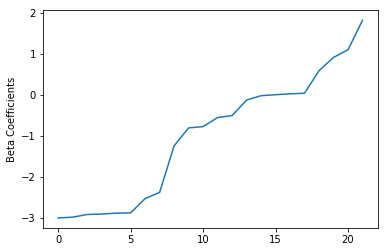

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Visualising the coefficients. Sort from lowest to highest.
beta = np.sort(lr_model.coefficients)

# Plot the data.
plt.plot(beta)

# Add a label to the data.
plt.ylabel('Beta Coefficients')

# Show the graph. 
plt.show()

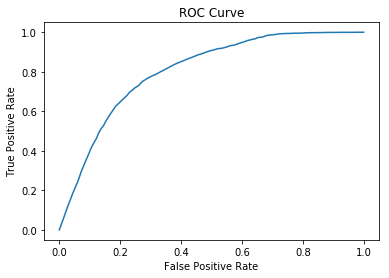

Area Under the Curve: 0.8040532412917517


In [64]:
# Let's get a summary of the data.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

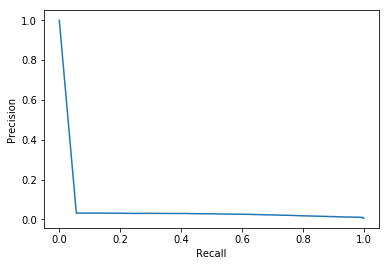

In [68]:
# Convert DataFrame to Pandas DataFrame.
pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [69]:
predictions = lr_model.transform(test_data)
predictions.select('label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[5.76364527116644...|       0.0|[0.99687018067150...|
|  0.0|[5.76364527116644...|       0.0|[0.99687018067150...|
|  0.0|[5.76364527116644...|       0.0|[0.99687018067150...|
|  0.0|[5.76364527116644...|       0.0|[0.99687018067150...|
|  0.0|[5.69179499835447...|       0.0|[0.99663781040747...|
|  0.0|[5.69179499835447...|       0.0|[0.99663781040747...|
|  0.0|[5.65586986194848...|       0.0|[0.99651525598842...|
|  0.0|[5.65586986194848...|       0.0|[0.99651525598842...|
|  0.0|[5.65586986194848...|       0.0|[0.99651525598842...|
|  0.0|[5.61994472554249...|       0.0|[0.99638825055457...|
+-----+--------------------+----------+--------------------+
only showing top 10 rows



In [70]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.804530467678024


## Random Forest

In [20]:
from pyspark.ml.classification import RandomForestClassifier

rfmodel = RandomForestClassifier(labelCol="label",featuresCol="features", numTrees = 150, maxDepth = 6, maxBins = 36)

# Train model with Training Data
rfmodel = rfmodel.fit(train_data)
rfResults = rfmodel.transform(test_data)

In [21]:
RFpredictions = rfmodel.transform(test_data)
RFpredictions.select('label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[149.348245940184...|       0.0|[0.99565497293456...|
|  0.0|[149.348245940184...|       0.0|[0.99565497293456...|
|  0.0|[149.348245940184...|       0.0|[0.99565497293456...|
|  0.0|[149.299852913041...|       0.0|[0.99533235275361...|
|  0.0|[149.301751398955...|       0.0|[0.99534500932637...|
|  0.0|[149.301751398955...|       0.0|[0.99534500932637...|
|  0.0|[149.309813215332...|       0.0|[0.99539875476888...|
|  0.0|[149.309813215332...|       0.0|[0.99539875476888...|
|  0.0|[149.295103806197...|       0.0|[0.99530069204131...|
|  0.0|[149.280280159415...|       0.0|[0.99520186772943...|
+-----+--------------------+----------+--------------------+
only showing top 10 rows



In [22]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(RFpredictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8114359656896519


## Gradient-Boosted Tree Classifier

In [23]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 6)
dtModel = dt.fit(train_data)
predictions = dtModel.transform(test_data)
predictions.select('label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+-------------+----------+--------------------+
|label|rawPrediction|prediction|         probability|
+-----+-------------+----------+--------------------+
|  0.0|[7865.0,27.0]|       0.0|[0.99657881398884...|
|  0.0|[7865.0,27.0]|       0.0|[0.99657881398884...|
|  0.0|[7865.0,27.0]|       0.0|[0.99657881398884...|
|  0.0|[7865.0,27.0]|       0.0|[0.99657881398884...|
|  0.0|[7865.0,27.0]|       0.0|[0.99657881398884...|
|  0.0|[7865.0,27.0]|       0.0|[0.99657881398884...|
|  0.0|[7865.0,27.0]|       0.0|[0.99657881398884...|
|  0.0|[7865.0,27.0]|       0.0|[0.99657881398884...|
|  0.0|[7865.0,27.0]|       0.0|[0.99657881398884...|
|  0.0|[7865.0,27.0]|       0.0|[0.99657881398884...|
+-----+-------------+----------+--------------------+
only showing top 10 rows



In [24]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.6284239778939835
